# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1030ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1030_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,-7.619,-59.9419,0.00303
1,-7.817,-61.7169,0.00312
2,-7.873,-61.3069,0.00310
3,-7.506,-58.4738,0.00296
4,-7.196,-56.0201,0.00284


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [-7.619, -7.817, -7.873, -7.506, -7.196, -6.871, -6.553, -6.214, -5.946, -5.607, -5.261, -5.014, -4.731, -4.435, -4.138, -3.841, -3.601, -3.319, -2.796, -2.796, -2.747, -2.74, -2.74, -2.705, -2.705, -2.697, -2.69, -2.669, -2.641, -0.078, 0.057, 0.035, 0.049, 0.064, 0.049, 0.064, 2.817, 2.817, 2.817, 2.832, 2.846, 2.888, 3.326, 3.566, 3.834, 4.096, 4.385, 4.639, 4.915, 5.169, 5.43, 5.713, 6.052, 6.327, 6.616, 6.906, 7.273, 7.542, 7.895, 8.177, 8.177, 7.979, 7.767, 7.584, 7.372, 7.231, 6.991, 6.835, 6.602, 6.426, 6.228, 6.059, 5.903, 5.706, 5.536, 5.353, 5.176, 4.985, 4.837, 4.675, 4.491, 4.357, 4.173, 4.018, 3.82, 3.714, 3.538, 3.326, 2.952, 2.93, 2.93, 2.902, 2.916, 2.888, 2.874, 2.888, 2.874, 2.874, 2.846, 2.874, 2.86, 2.832, 2.825, 2.817, 2.803, 2.775, 2.69, 0.092, 0.099, 0.106, 0.099, 0.092, 0.12, 0.099, 0.099, 0.127, -2.655, -2.655, -2.655, -2.655, -2.683, -2.683, -2.69, -2.697, -2.712, -2.733, -3.022, -3.206, -3.404, -3.615, -3.743, -3.954, -4.103, -4.279, -4.477, -4.604, -4.

In [5]:
lower_limit = V.index(0.057) + 5 
upper_limit = V.index(5.43)

print(lower_limit)
print(upper_limit)

35
50


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.064 2.817 2.817 2.817 2.832 2.846 2.888 3.326 3.566 3.834 4.096 4.385
 4.639 4.915 5.169]
I =  [10.5396 12.2819 13.9443 16.1245 17.9794 19.9618 21.9114 23.8426 25.8312
 28.2154 30.0845 32.5015 34.4122 36.853  39.1076]


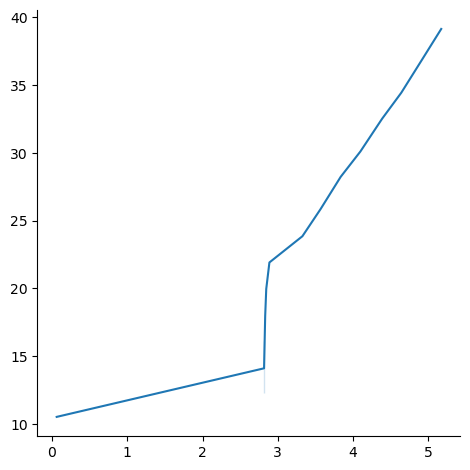

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

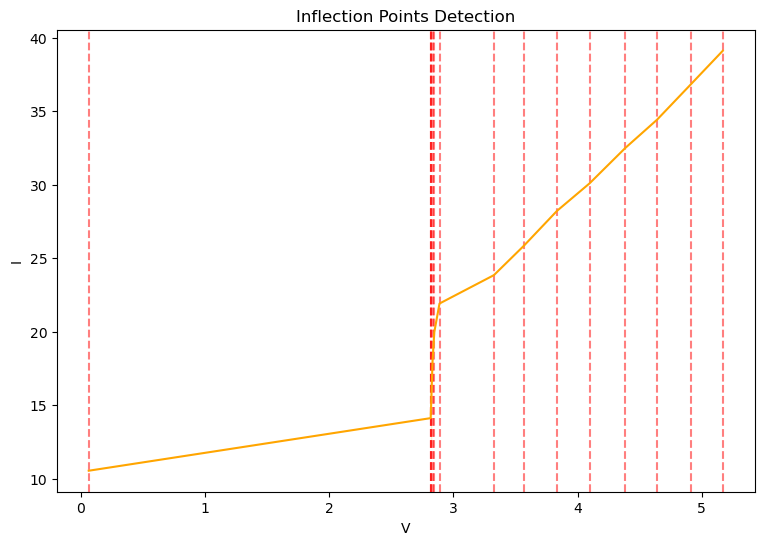

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

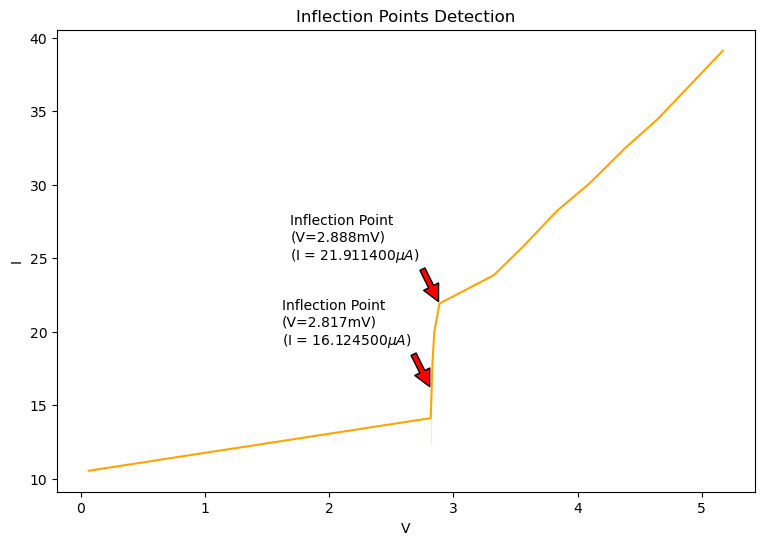

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 6]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[-7.619, -7.817, -7.873, -7.506, -7.196, -6.871, -6.553, -6.214, -5.946, -5.607, -5.261, -5.014, -4.731, -4.435, -4.138, -3.841, -3.601, -3.319, -2.796, -2.796, -2.747, -2.74, -2.74, -2.705, -2.705, -2.697, -2.69, -2.669, -2.641, -0.078, 0.057, 0.035, 0.049, 0.064, 0.049, 0.064, 2.817, 2.817, 2.817, 2.832, 2.846, 2.888, 3.326, 3.566, 3.834, 4.096, 4.385, 4.639, 4.915, 5.169, 5.43, 5.713, 6.052, 6.327, 6.616, 6.906, 7.273, 7.542, 7.895, 8.177, 8.177, 7.979, 7.767, 7.584, 7.372, 7.231, 6.991, 6.835, 6.602, 6.426, 6.228, 6.059, 5.903, 5.706, 5.536, 5.353, 5.176, 4.985, 4.837, 4.675, 4.491, 4.357, 4.173, 4.018, 3.82, 3.714, 3.538, 3.326, 2.952, 2.93, 2.93, 2.902, 2.916, 2.888, 2.874, 2.888, 2.874, 2.874, 2.846, 2.874, 2.86, 2.832, 2.825, 2.817, 2.803, 2.775, 2.69, 0.092, 0.099, 0.106, 0.099, 0.092, 0.12, 0.099, 0.099, 0.127, -2.655, -2.655, -2.655, -2.655, -2.683, -2.683, -2.69, -2.697, -2.712, -2.733, -3.022, -3.206, -3.404, -3.615, -3.743, -3.954, -4.103, -4.279, -4.477, -4.604, -4.802]


In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

#Function for detecting the first occurrence of an item in a list
def find_first_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            first_occurrence = i
            break
    return first_occurrence

low_limit = find_first_occurrence(2.888, list(df[0])) #the second change point above 
up_limit = list(df[0]).index(df[0].max()) 

print(low_limit) 
print(up_limit)

41
59


In [12]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.888 3.326 3.566 3.834 4.096 4.385 4.639 4.915 5.169 5.43  5.713 6.052
 6.327 6.616 6.906 7.273 7.542 7.895]
[21.9114 23.8426 25.8312 28.2154 30.0845 32.5015 34.4122 36.853  39.1076
 41.3643 43.5936 45.7499 47.9704 50.6043 53.0396 55.578  57.9138 60.4235]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.01473))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 18
    # variables        = 2
    chi-square         = 16.0107493
    reduced chi-square = 1.00067183
    Akaike info crit   = 1.89199423
    Bayesian info crit = 3.67273774
    R-squared          = 1.00000000
[[Variables]]
    slope:      7886.84260 +/- 90.6540225 (1.15%) (init = 7947.478)
    intercept: -1843449.32 +/- 424526.525 (23.03%) (init = -2139280)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9577


## Plot the model

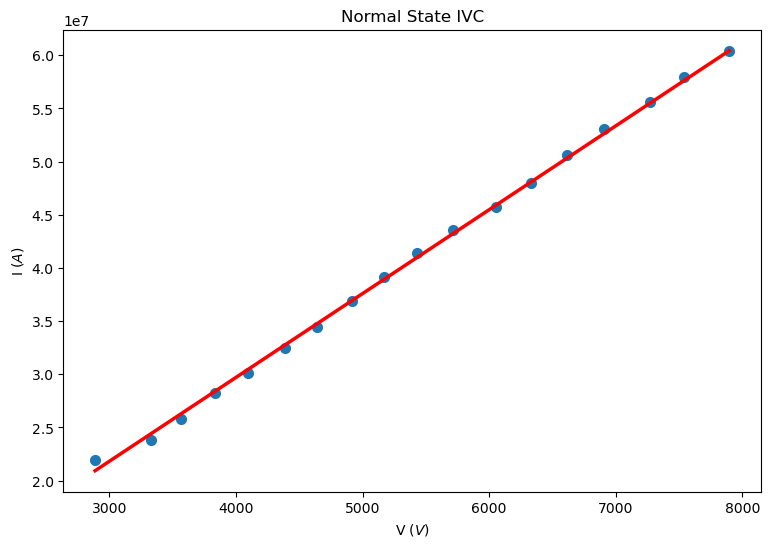

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7886.842597726694, 'intercept': -1843449.319906387}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000127 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.9827763 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.9827763 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.6625067992224303e-22 J
Gap Energy = 5.325013598444861e-22 J
Gap Voltage = 3.323563599079304 mV
Josephson Current = 19.745972684288468 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.1347906786833564e-22 J
Gap Energy =  4.269581357366713e-22 J
Gap Voltage = 2.66482421505849 mV
Josephson Current = 15.087737243417962 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[6], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 21.9114, 'Ic_weak': 19.746, 'Ic_strong': 15.0877, 'V_gap': 2.817, 'Vg_weak': 3.3236, 'Vg_strong': 2.6648, 'Temp': 4.9828}


## Export the results to a csv file

In [19]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>